In [1]:
from pathlib import Path

import pandas as pd

DATA_DIR = Path("../DATA").resolve()
assert DATA_DIR.exists(), f"Le dossier DATA est introuvable: {DATA_DIR}"

x_train = pd.read_csv(DATA_DIR / "x_train.csv")
y_train = pd.read_csv(DATA_DIR / "y_train.csv")
x_test = pd.read_csv(DATA_DIR / "x_test.csv")

# === Aperçu rapide ===
print("=== Dimensions ===")
print(f"x_train : {x_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"x_test  : {x_test.shape}\n")

print("=== Colonnes de x_train ===")
print(x_train.columns.tolist())

print("\n=== Colonnes de y_train ===")
print(y_train.columns.tolist()[:10], "...")  # on tronque car il y a 23 labels

print("\n=== Aperçu des données ===")
display(x_train.head(3))
display(y_train.head(3))
display(x_test.head(3))


=== Dimensions ===
x_train : (202933, 14)
y_train : (202933, 24)
x_test  : (134673, 14)

=== Colonnes de x_train ===
['ID', 'Humidity', 'M12', 'M13', 'M14', 'M15', 'M4', 'M5', 'M6', 'M7', 'R', 'S1', 'S2', 'S3']

=== Colonnes de y_train ===
['ID', 'c01', 'c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09'] ...

=== Aperçu des données ===


,ID,Humidity,M12,M13,M14,M15,M4,M5,M6,M7,R,S1,S2,S3
0,0,0.098160,-0.175981,-0.086469,-0.041465,-0.021153,0.197597,0.054646,-0.009277,0.001855,1.007242,1.013007,1.000563,0.999397
1,1,0.000307,-0.066416,0.036071,0.032636,-0.000573,2.568494,1.883142,0.779251,0.262231,0.971428,0.996735,1.002226,1.013063
2,2,0.000388,0.190943,0.187540,0.143680,0.092635,-0.147460,-0.021174,0.040079,0.065790,1.302238,0.905275,0.953600,0.986347


,ID,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
0,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,1,0.000000,0.0,0.176471,0.176471,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.176471,0.0,0.0,0.176471,0.0
2,2,0.128465,0.0,0.128465,0.128465,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.128465,0.000000,0.0,0.0,0.128465,0.0


,ID,Humidity,M12,M13,M14,M15,M4,M5,M6,M7,R,S1,S2,S3
0,202933,0.869916,0.021914,-0.015737,0.009041,0.015662,-0.139344,-0.041396,-0.006051,0.001638,1.008217,1.000922,1.003093,0.998643
1,202934,0.904594,-0.100771,-0.040901,0.006137,0.013496,0.843534,0.501194,0.134963,0.024947,1.010621,0.987593,1.003104,1.009033
2,202935,0.688853,0.703585,1.029723,0.785505,0.293766,-0.536002,-0.166262,-0.029509,-0.015855,1.075560,1.015945,1.038617,1.067383


In [2]:
# === Vérification des types et valeurs manquantes ===
print("=== Types de données ===")
print(x_train.dtypes)

print("\n=== Valeurs manquantes ===")
print(x_train.isna().sum().sort_values(ascending=False).head(10))

print("\n=== Doublons dans x_train ===")
print(x_train.duplicated().sum())

print("\n=== Valeurs manquantes dans y_train ===")
print(y_train.isna().sum().sum())

print("\n=== Vérif de l’alignement ID ===")
if 'ID' in x_train.columns and 'ID' in y_train.columns:
    print("IDs alignés :", (x_train['ID'] == y_train['ID']).all())
else:
    print("⚠️ Colonne ID manquante dans un des fichiers")


=== Types de données ===
ID            int64
Humidity    float64
M12         float64
M13         float64
M14         float64
M15         float64
M4          float64
M5          float64
M6          float64
M7          float64
R           float64
S1          float64
S2          float64
S3          float64
dtype: object

=== Valeurs manquantes ===
ID          0
Humidity    0
M12         0
M13         0
M14         0
M15         0
M4          0
M5          0
M6          0
M7          0
dtype: int64

=== Doublons dans x_train ===
0

=== Valeurs manquantes dans y_train ===
0

=== Vérif de l’alignement ID ===
IDs alignés : True


=== Statistiques descriptives - TRAIN ===


,count,mean,std,min,25%,50%,75%,max
ID,202933.0,101466.000000,58581.855426,0.000000,50733.000000,101466.000000,152199.000000,202932.000000
Humidity,202933.0,0.225423,0.335276,0.000305,0.000379,0.090586,0.328115,0.958255
M12,202933.0,-0.298982,1.421943,-13.021540,-0.288159,-0.000912,0.209746,2.545019
M13,202933.0,-0.249076,1.246752,-11.844691,-0.179096,0.018658,0.177158,2.864641
M14,202933.0,-0.155972,0.848411,-9.117980,-0.087792,0.019633,0.120979,2.004906
M15,202933.0,-0.048803,0.361638,-4.165993,-0.032232,0.012752,0.067154,0.842932
M4,202933.0,0.891061,2.433388,-2.831466,-0.050034,0.158831,0.657085,28.245698
M5,202933.0,0.454768,1.578226,-0.790972,-0.006129,0.067587,0.259512,28.710670
M6,202933.0,0.175309,0.815405,-0.224497,0.002863,0.035869,0.120237,20.508550
M7,202933.0,0.080895,0.392956,-0.147250,0.001548,0.025857,0.076909,10.714200



=== Statistiques descriptives - TEST ===


,count,mean,std,min,25%,50%,75%,max
ID,134673.0,270269.000000,38876.890739,202933.000000,2.366010e+05,270269.000000,303937.000000,337605.000000
Humidity,134673.0,0.512111,0.311513,0.000302,3.197432e-01,0.443906,0.861781,1.000000
M12,134673.0,-0.356558,1.058815,-10.397074,-4.264813e-01,-0.093537,0.079529,2.488240
M13,134673.0,-0.331985,1.163538,-9.167168,-3.156221e-01,-0.053342,0.076521,3.361838
M14,134673.0,-0.234986,0.916980,-8.334618,-1.971329e-01,-0.021471,0.062562,2.729938
M15,134673.0,-0.098620,0.412973,-4.093527,-8.869878e-02,-0.004367,0.038697,1.243244
M4,134673.0,1.001944,2.698596,-1.683287,-1.376902e-01,0.122567,0.812291,25.145013
M5,134673.0,0.598529,1.869229,-1.411182,-4.086498e-02,0.055494,0.352760,25.682073
M6,134673.0,0.216230,0.906530,-0.559817,-1.285989e-03,0.036436,0.104308,15.647711
M7,134673.0,0.074953,0.412227,-0.477393,6.661338e-16,0.025156,0.060852,11.740906


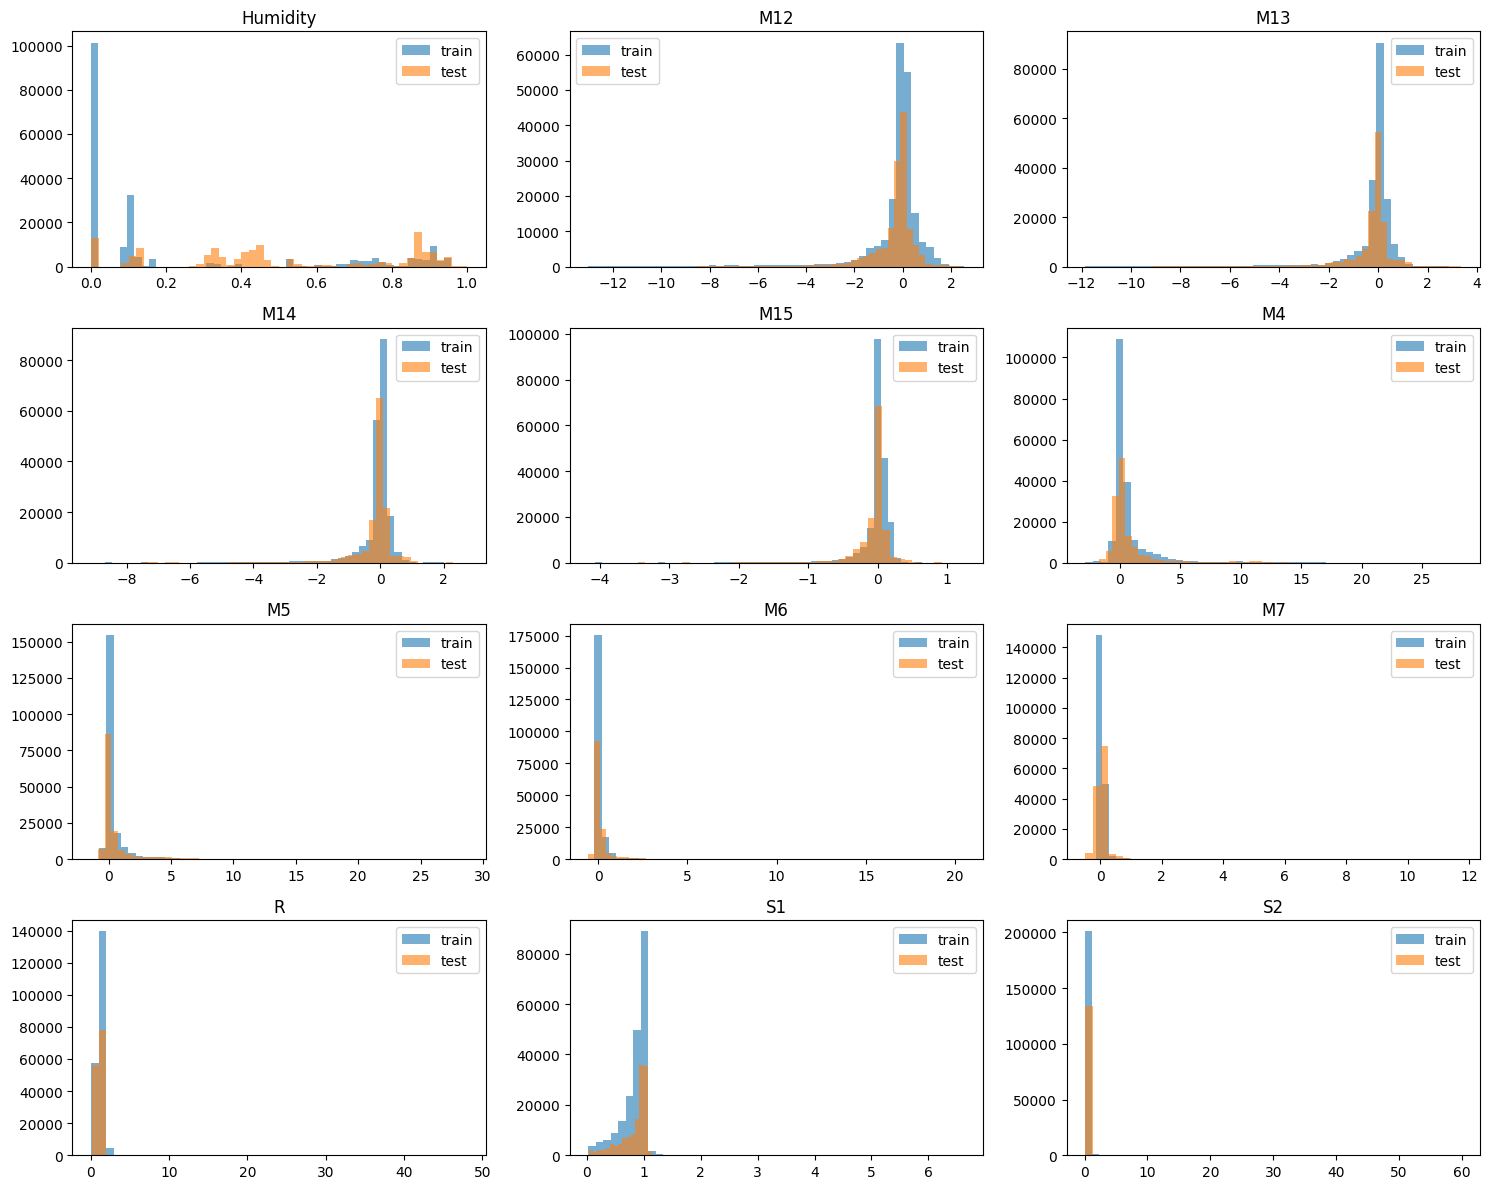

In [3]:
import matplotlib.pyplot as plt

# Statistiques descriptives
desc_train = x_train.describe().T
desc_test = x_test.describe().T

print("=== Statistiques descriptives - TRAIN ===")
display(desc_train)
print("\n=== Statistiques descriptives - TEST ===")
display(desc_test)

# Comparaison rapide train/test pour chaque feature
common_features = [col for col in x_train.columns if col != 'ID']

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(common_features[:12]):  # on exclut ID
    axes[i].hist(x_train[col], bins=50, alpha=0.6, label='train')
    axes[i].hist(x_test[col], bins=50, alpha=0.6, label='test')
    axes[i].set_title(col)
    axes[i].legend()

plt.tight_layout()
plt.show()


,count,mean,std,min,25%,50%,75%,max
c01,202933.0,0.271213,0.329756,0.0,0.00000,0.071146,0.539761,1.0
c02,202933.0,0.076974,0.214348,0.0,0.00000,0.000000,0.000000,1.0
c03,202933.0,0.450757,0.316191,0.0,0.16208,0.444444,0.726679,1.0
c04,202933.0,0.450757,0.316191,0.0,0.16208,0.444444,0.726679,1.0
c05,202933.0,0.027728,0.133721,0.0,0.00000,0.000000,0.000000,1.0
c06,202933.0,0.027728,0.133721,0.0,0.00000,0.000000,0.000000,1.0
c07,202933.0,0.076974,0.214348,0.0,0.00000,0.000000,0.000000,1.0
c08,202933.0,0.005324,0.060015,0.0,0.00000,0.000000,0.000000,1.0
c09,202933.0,0.013327,0.093665,0.0,0.00000,0.000000,0.000000,1.0
c10,202933.0,0.071649,0.207621,0.0,0.00000,0.000000,0.000000,1.0


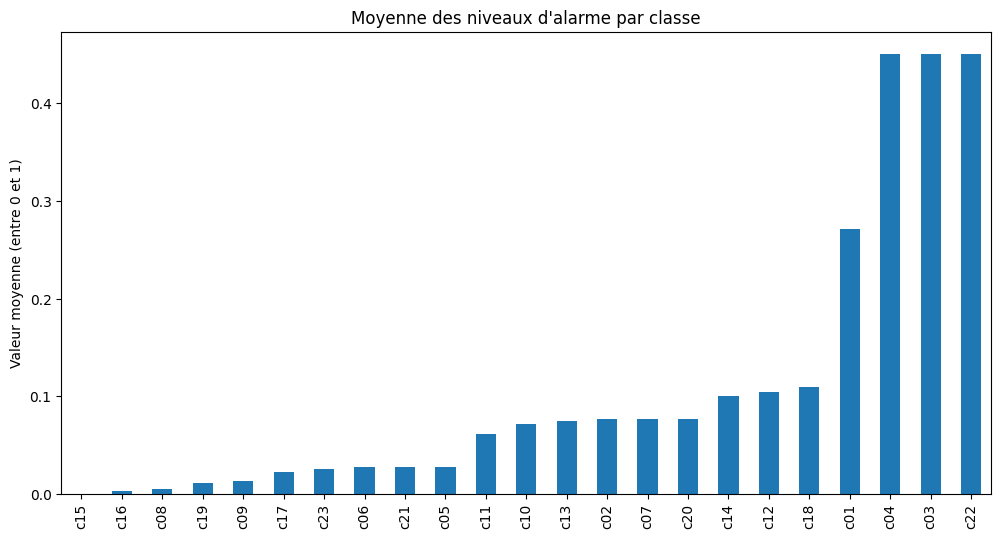

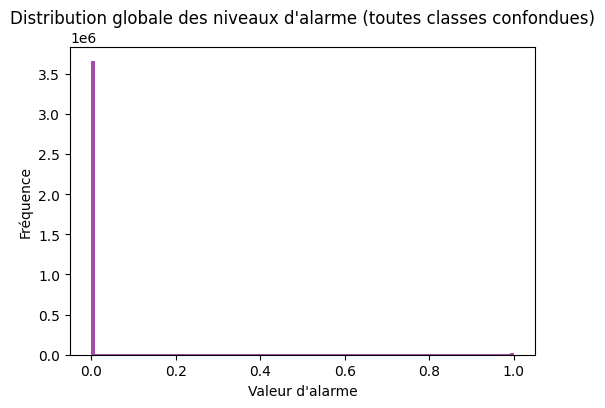

In [4]:
import numpy as np

y_cols = [c for c in y_train.columns if c != 'ID']
y_stats = y_train[y_cols].describe().T
display(y_stats)

# Moyenne des 23 cibles (pour voir la densité d’alarmes)
mean_targets = y_train[y_cols].mean().sort_values()

plt.figure(figsize=(12, 6))
mean_targets.plot(kind='bar')
plt.title("Moyenne des niveaux d'alarme par classe")
plt.ylabel("Valeur moyenne (entre 0 et 1)")
plt.show()

# Distribution globale des valeurs cibles (toutes classes confondues)
plt.figure(figsize=(6,4))
plt.hist(y_train[y_cols].values.flatten(), bins=100, color='purple', alpha=0.7)
plt.title("Distribution globale des niveaux d'alarme (toutes classes confondues)")
plt.xlabel("Valeur d'alarme")
plt.ylabel("Fréquence")
plt.show()


In [5]:
from scipy.stats import ks_2samp
import pandas as pd

results = []
for col in [c for c in x_train.columns if c != "ID"]:
    stat, pval = ks_2samp(x_train[col], x_test[col])
    results.append((col, stat, pval))

ks_df = pd.DataFrame(results, columns=["Feature", "KS_statistic", "p_value"])
ks_df["Different_distribution"] = ks_df["p_value"] < 0.01
ks_df.sort_values("KS_statistic", ascending=False, inplace=True)
display(ks_df)


,Feature,KS_statistic,p_value,Different_distribution
0,Humidity,0.588544,0.000000e+00,True
12,S3,0.230090,0.000000e+00,True
9,R,0.181739,0.000000e+00,True
2,M13,0.149439,0.000000e+00,True
1,M12,0.144572,0.000000e+00,True
3,M14,0.135277,0.000000e+00,True
11,S2,0.133174,0.000000e+00,True
4,M15,0.124098,0.000000e+00,True
6,M5,0.103531,0.000000e+00,True
5,M4,0.100708,0.000000e+00,True


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
import numpy as np

# Préparation des données
train_adv = x_train.copy()
train_adv["is_test"] = 0
test_adv = x_test.copy()
test_adv["is_test"] = 1

adv = pd.concat([train_adv, test_adv], ignore_index=True)
y_adv = adv["is_test"]
X_adv = adv.drop(columns=["is_test", "ID"])

# Split & model
X_tr, X_val, y_tr, y_val = train_test_split(X_adv, y_adv, test_size=0.3, random_state=42)

model_adv = LGBMClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    n_jobs=-1,
    verbose=-1
)
model_adv.fit(X_tr, y_tr)
auc = roc_auc_score(y_val, model_adv.predict_proba(X_val)[:, 1])
print(f"AUC adversarial validation = {auc:.4f}")


AUC adversarial validation = 0.9993


In [7]:
import numpy as np
import pandas as pd

def robust_preprocess_no_weights(x_train, x_test):
    xtr = x_train.copy()
    xte = x_test.copy()
    
    # 1) Humidity: quantile clipping commun, percentile-rank, flag OOR
    hum_all = np.concatenate([xtr["Humidity"].values, xte["Humidity"].values])
    q1, q99 = np.percentile(hum_all, [1, 99])
    xtr["Humidity_clip"] = np.clip(xtr["Humidity"], q1, q99)
    xte["Humidity_clip"] = np.clip(xte["Humidity"], q1, q99)
    # percentile rank sur le pool train+test (autorisé en compétition, non supervisé)
    hum_all_clip = np.concatenate([xtr["Humidity_clip"].values, xte["Humidity_clip"].values])
    ranks = pd.Series(hum_all_clip).rank(pct=True).values
    xtr["Humidity_rank"] = ranks[:len(xtr)]
    xte["Humidity_rank"] = ranks[len(xtr):]
    # flag out-of-range
    xtr["Humidity_OOR"] = ((xtr["Humidity"] < q1) | (xtr["Humidity"] > q99)).astype(int)
    xte["Humidity_OOR"] = ((xte["Humidity"] < q1) | (xte["Humidity"] > q99)).astype(int)

    # 2) Transfos robustes capteurs
    pos_cols = ["R","S1","S2","S3"]  # >0
    zero_center_cols = ["M12","M13","M14","M15","M4","M5","M6","M7"]  # valeurs +- autour de 0

    for c in pos_cols:
        xtr[c+"_log1p"] = np.log1p(xtr[c].clip(lower=0))
        xte[c+"_log1p"] = np.log1p(xte[c].clip(lower=0))

    for c in zero_center_cols:
        # asinh ~ log signé; garde l'info du signe et réduit les longues queues
        xtr[c+"_asinh"] = np.arcsinh(xtr[c].values)
        xte[c+"_asinh"] = np.arcsinh(xte[c].values)

    # 3) Gradients locaux (capteurs voisins)
    for a,b,name in [("M4","M5","g45"),("M5","M6","g56"),("M6","M7","g67"),
                     ("M12","M13","g1213"),("M13","M14","g1314"),("M14","M15","g1415")]:
        xtr[name] = xtr[b] - xtr[a]
        xte[name] = xte[b] - xte[a]

    # 4) Clipping doux post-transfo pour limiter outliers résiduels
    new_cols = [c for c in xtr.columns if c not in ["ID"]]
    for c in new_cols:
        allv = np.concatenate([xtr[c].values, xte[c].values])
        ql, qh = np.percentile(allv, [1, 99])
        xtr[c] = np.clip(xtr[c], ql, qh)
        xte[c] = np.clip(xte[c], ql, qh)

    # 5) Colonnes finales (on garde les originales + features dérivées utiles)
    keep = ["ID","Humidity","Humidity_clip","Humidity_rank","Humidity_OOR",
            "R_log1p","S1_log1p","S2_log1p","S3_log1p"] + \
           [c+"_asinh" for c in zero_center_cols] + \
           ["g45","g56","g67","g1213","g1314","g1415"]

    xtr_p = xtr[keep].copy()
    xte_p = xte[keep].copy()
    return xtr_p, xte_p

x_train_p, x_test_p = robust_preprocess_no_weights(x_train, x_test)
print(x_train_p.shape, x_test_p.shape)
x_train_p.head()


(202933, 23) (134673, 23)


,ID,Humidity,Humidity_clip,Humidity_rank,Humidity_OOR,R_log1p,S1_log1p,S2_log1p,S3_log1p,M12_asinh,...,M4_asinh,M5_asinh,M6_asinh,M7_asinh,g45,g56,g67,g1213,g1314,g1415
0,0,0.098160,0.098160,0.391655,0,0.696761,0.699630,0.693429,0.692845,-0.175086,...,0.196334,0.054619,-0.009277,0.001855,-0.142951,-0.063923,0.011133,0.089513,0.045004,0.020313
1,1,0.000307,0.000307,0.022283,0,0.678758,0.691514,0.694259,0.699658,-0.066367,...,1.672373,1.390119,0.716384,0.259315,-0.685352,-1.103891,-0.517020,0.102487,-0.003435,-0.033208
2,2,0.000388,0.000388,0.228125,0,0.833882,0.644627,0.669674,0.686297,0.189801,...,-0.146931,-0.021172,0.040068,0.065743,0.126286,0.061253,0.025711,-0.003403,-0.043860,-0.051044
3,3,0.761003,0.761003,0.769779,0,0.699994,0.695302,0.699279,0.697868,-0.150821,...,0.045364,0.102248,0.012914,0.004453,0.057047,-0.089512,-0.008462,0.067671,0.034740,0.030724
4,4,0.107808,0.107808,0.432781,0,0.692476,0.695721,0.693195,0.692924,0.074749,...,-0.056255,-0.011192,0.010233,0.012204,0.045092,0.021426,0.001971,-0.032127,-0.016522,-0.007036


In [8]:
from scipy.stats import ks_2samp
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier

# KS par feature
ks_res = []
for col in [c for c in x_train_p.columns if c != "ID"]:
    stat, pval = ks_2samp(x_train_p[col], x_test_p[col])
    ks_res.append((col, stat, pval))
ks_df_after = pd.DataFrame(ks_res, columns=["Feature","KS_statistic","p_value"]).sort_values("KS_statistic", ascending=False)
display(ks_df_after.head(12))

# Adversarial AUC
tr = x_train_p.copy(); tr["is_test"]=0
te = x_test_p.copy();  te["is_test"]=1
adv = pd.concat([tr, te], ignore_index=True)

X = adv.drop(columns=["is_test","ID"])
y = adv["is_test"]
Xtr, Xva, ytr, yva = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
clf = LGBMClassifier(n_estimators=300, max_depth=6, learning_rate=0.1, n_jobs=-1, verbose=-1)
clf.fit(Xtr, ytr)
auc_after = roc_auc_score(yva, clf.predict_proba(Xva)[:,1])
print(f"AUC adversarial (après prétraitement) = {auc_after:.4f}")


,Feature,KS_statistic,p_value
0,Humidity,0.588544,0.0
1,Humidity_clip,0.588544,0.0
2,Humidity_rank,0.588544,0.0
7,S3_log1p,0.230090,0.0
4,R_log1p,0.181739,0.0
9,M13_asinh,0.149439,0.0
8,M12_asinh,0.144572,0.0
10,M14_asinh,0.135277,0.0
6,S2_log1p,0.133174,0.0
11,M15_asinh,0.124098,0.0


AUC adversarial (après prétraitement) = 1.0000


In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# On suppose que x_train, y_train, x_test, x_train_p, x_test_p sont déjà chargés et prétraités
y_cols = [c for c in y_train.columns if c != "ID"]
if "c15" in y_cols:
    y_cols.remove("c15")

# === 1️⃣ Définir le seuil d’humidité basé sur le test ===
hum_thresh = np.percentile(x_test["Humidity"].values, 25)  # environ 0.32 typiquement
print(f"Seuil humidité (25e percentile du test) = {hum_thresh:.3f}")

mask_humid = x_train_p["Humidity"] >= hum_thresh
mask_dry   = ~mask_humid

print("Taille train total :", len(x_train_p))
print("train_humid        :", mask_humid.sum())
print("train_dry          :", mask_dry.sum())

# === 2️⃣ Construire les sous-ensembles ===
X_tr_humid = x_train_p.loc[mask_humid].drop(columns=["ID"])
Y_tr_humid = y_train.loc[mask_humid, y_cols].copy()
X_te_all   = x_test_p.drop(columns=["ID"]).copy()

print("Formes X_tr_humid, Y_tr_humid, X_te_all :",
      X_tr_humid.shape, Y_tr_humid.shape, X_te_all.shape)

# === 3️⃣ Entraînement du modèle RandomForest multi-sorties ===
rf_base = RandomForestRegressor(
    n_estimators=10,         # benchmark = 5 → on augmente légèrement
    max_depth=8,             # un peu plus profond
    min_samples_split=0.01,
    min_samples_leaf=30,
    n_jobs=-1,
    random_state=42
)

rf_multi = MultiOutputRegressor(rf_base, n_jobs=-1)
rf_multi.fit(X_tr_humid, Y_tr_humid)

# === 4️⃣ Prédiction sur tout le test ===
preds_all = rf_multi.predict(X_te_all)
preds_all = np.clip(preds_all, 0, 1)

# === 5️⃣ Reconstruction du fichier de soumission ===
df_pred = pd.DataFrame(preds_all, columns=y_cols)
# Réinsérer c15 = 0 à la bonne position
all_targets = [c for c in y_train.columns if c != "ID"]
if "c15" in all_targets:
    c15_pos = all_targets.index("c15")
    df_pred.insert(c15_pos, "c15", 0.0)

# Ajouter ID et réordonner les colonnes
sub = pd.concat([x_test_p["ID"], df_pred[all_targets]], axis=1)

# === 6️⃣ Sauvegarde ===
sub_path = "submission_rf_humid.csv"
sub.to_csv(sub_path, index=False)
print(f"✅ Fichier de soumission créé : {sub_path}")
sub.head()


Seuil humidité (25e percentile du test) = 0.320
Taille train total : 202933
train_humid        : 51754
train_dry          : 151179
Formes X_tr_humid, Y_tr_humid, X_te_all : (51754, 22) (51754, 22) (134673, 22)
✅ Fichier de soumission créé : submission_rf_humid.csv


,ID,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
0,202933,0.000274,0.000054,0.005020,0.005020,0.000000,0.000000,0.000054,0.000000,0.0,...,2.229788e-05,0.0,0.000000,0.0,0.000000,0.0,0.000054,0.000000,0.005020,0.000479
1,202934,0.537514,0.000054,0.595097,0.595097,0.000000,0.000000,0.000054,0.000000,0.0,...,6.788171e-01,0.0,0.004295,0.0,0.000000,0.0,0.000054,0.000000,0.595097,0.000000
2,202935,0.082720,0.000054,0.145344,0.145344,0.692338,0.692338,0.000054,0.000000,0.0,...,2.820585e-04,0.0,0.000000,0.0,0.045777,0.0,0.000054,0.692338,0.145344,0.044487
3,202936,0.000274,0.000054,0.564524,0.564524,0.350121,0.350121,0.000054,0.000114,0.0,...,5.900934e-07,0.0,0.000000,0.0,0.002842,0.0,0.000054,0.350121,0.564524,0.289438
4,202937,0.001465,0.000054,0.179398,0.179398,0.000000,0.000000,0.000054,0.000003,0.0,...,5.900934e-07,0.0,0.000000,0.0,0.002860,0.0,0.000054,0.000000,0.179398,0.166236


In [10]:
# 1️⃣ Entraînement du modèle "sec"
rf_multi_dry = MultiOutputRegressor(rf_base, n_jobs=-1)
X_tr_dry = x_train_p.loc[mask_dry].drop(columns=["ID"])
Y_tr_dry = y_train.loc[mask_dry, [c for c in y_train.columns if c not in ["ID", "c15"]]].copy()
rf_multi_dry.fit(X_tr_dry, Y_tr_dry)

# 2️⃣ Prédictions "sec"
preds_dry = rf_multi_dry.predict(X_te_all)
preds_dry = np.clip(preds_dry, 0, 1)

# 3️⃣ Blending linéaire basé sur l’humidité du test
# pondération = interpolation entre 0.25 et 0.75 autour du seuil
hum = x_test_p["Humidity"].values
w_humid = np.clip((hum - (hum_thresh - 0.05)) / 0.1, 0, 1)

# reshape pour diffusion sur les 22 cibles
blended = preds_dry * (1 - w_humid[:, None]) + preds_all * (w_humid[:, None])
blended = np.clip(blended, 0, 1)

# 4️⃣ Reconstruction du DataFrame de soumission
df_pred_blend = pd.DataFrame(blended, columns=[c for c in y_train.columns if c not in ["ID", "c15"]])
all_targets = [c for c in y_train.columns if c != "ID"]
if "c15" in all_targets:
    df_pred_blend.insert(all_targets.index("c15"), "c15", 0.0)
sub_blend = pd.concat([x_test_p["ID"], df_pred_blend[all_targets]], axis=1)

# 5️⃣ Sauvegarde finale
sub_path_blend = "submission_rf_blended.csv"
sub_blend.to_csv(sub_path_blend, index=False)
print(f"✅ Fichier de soumission créé : {sub_path_blend}")
sub_blend.head()


✅ Fichier de soumission créé : submission_rf_blended.csv


,ID,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
0,202933,0.000274,0.000054,0.005020,0.005020,0.000000,0.000000,0.000054,0.000000,0.0,...,2.229788e-05,0.0,0.000000,0.0,0.000000,0.0,0.000054,0.000000,0.005020,0.000479
1,202934,0.537514,0.000054,0.595097,0.595097,0.000000,0.000000,0.000054,0.000000,0.0,...,6.788171e-01,0.0,0.004295,0.0,0.000000,0.0,0.000054,0.000000,0.595097,0.000000
2,202935,0.082720,0.000054,0.145344,0.145344,0.692338,0.692338,0.000054,0.000000,0.0,...,2.820585e-04,0.0,0.000000,0.0,0.045777,0.0,0.000054,0.692338,0.145344,0.044487
3,202936,0.000274,0.000054,0.564524,0.564524,0.350121,0.350121,0.000054,0.000114,0.0,...,5.900934e-07,0.0,0.000000,0.0,0.002842,0.0,0.000054,0.350121,0.564524,0.289438
4,202937,0.001465,0.000054,0.179398,0.179398,0.000000,0.000000,0.000054,0.000003,0.0,...,5.900934e-07,0.0,0.000000,0.0,0.002860,0.0,0.000054,0.000000,0.179398,0.166236


In [11]:
import numpy as np

def weighted_rmse(y_true, y_pred, alpha=0.2):
    """
    RMSE pondéré : pèse plus fort les vraies alarmes (y_true > 0.5).
    """
    weights = 1 + alpha * (y_true > 0.5)
    mse = np.average((y_true - y_pred) ** 2, weights=weights)
    return np.sqrt(mse)


In [12]:
from sklearn.model_selection import train_test_split

# On reprend les données prétraitées (x_train_p / y_train)
X = x_train_p.drop(columns=["ID"])
Y = y_train.drop(columns=["ID", "c15"])  # c15 constante

# Split train/val
X_tr, X_val, Y_tr, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Modèle baseline : RandomForest (même config que le "humid")
rf_base = RandomForestRegressor(
    n_estimators=10,
    max_depth=8,
    min_samples_split=0.01,
    min_samples_leaf=30,
    n_jobs=-1,
    random_state=42
)

rf_multi_val = MultiOutputRegressor(rf_base, n_jobs=-1)
rf_multi_val.fit(X_tr, Y_tr)

# Prédictions sur la validation
Y_pred_val = rf_multi_val.predict(X_val)
Y_pred_val = np.clip(Y_pred_val, 0, 1)

# Score global
score_global = weighted_rmse(Y_val.values, Y_pred_val)
print(f"✅ Score local global (RMSE pondéré) = {score_global:.5f}")

# Score par colonne
for i, col in enumerate(Y.columns):
    sc = weighted_rmse(Y_val.iloc[:, i].values, Y_pred_val[:, i])
    print(f"{col}: {sc:.5f}")


✅ Score local global (RMSE pondéré) = 0.10522
c01: 0.12869
c02: 0.13212
c03: 0.16463
c04: 0.16463
c05: 0.05450
c06: 0.05450
c07: 0.13212
c08: 0.04835
c09: 0.07111
c10: 0.11335
c11: 0.05194
c12: 0.12966
c13: 0.09218
c14: 0.07845
c16: 0.03487
c17: 0.07621
c18: 0.10433
c19: 0.06963
c20: 0.13212
c21: 0.05450
c22: 0.16463
c23: 0.05165


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# (Re)définition de la métrique si besoin
def weighted_rmse(y_true, y_pred, alpha=0.2):
    import numpy as np
    weights = 1 + alpha * (y_true > 0.5)
    mse = np.average((y_true - y_pred) ** 2, weights=weights)
    return np.sqrt(mse)

# Prépare X, Y (on retire ID et c15 constante)
X_full = x_train_p.drop(columns=["ID"]).copy()
Y_full = y_train.drop(columns=["ID"]).copy()
if "c15" in Y_full.columns:
    Y_full = Y_full.drop(columns=["c15"])

# Seuil humidité basé sur le test (plus représentatif du domaine LB)
hum_thresh = np.percentile(x_test["Humidity"].values, 25)
print(f"Seuil humidité (P25 test) = {hum_thresh:.3f}")

mask_humid = x_train_p["Humidity"].values >= hum_thresh
Xh = X_full.loc[mask_humid].reset_index(drop=True)
Yh = Y_full.loc[mask_humid].reset_index(drop=True)

print("Tailles (humid subset) -> Xh:", Xh.shape, "Yh:", Yh.shape)

# Stratification simple par bins d'humidité (pour garder le profil)
hum_bins = pd.qcut(x_train_p.loc[mask_humid, "Humidity"], q=10, duplicates="drop")

X_tr_h, X_va_h, Y_tr_h, Y_va_h, strat_tr, strat_va = train_test_split(
    Xh, Yh, hum_bins, test_size=0.2, random_state=42, stratify=hum_bins
)

print("Split humid -> X_tr_h:", X_tr_h.shape, "X_va_h:", X_va_h.shape)


Seuil humidité (P25 test) = 0.320
Tailles (humid subset) -> Xh: (51754, 22) Yh: (51754, 22)
Split humid -> X_tr_h: (41403, 22) X_va_h: (10351, 22)


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import numpy as np

# Même config que ton RF baseline (cohérence de comparaison)
rf_base = RandomForestRegressor(
    n_estimators=10,
    max_depth=8,
    min_samples_split=0.01,
    min_samples_leaf=30,
    n_jobs=-1,
    random_state=42
)

rf_multi_humid = MultiOutputRegressor(rf_base, n_jobs=-1)
rf_multi_humid.fit(X_tr_h, Y_tr_h)

Y_hat_h = rf_multi_humid.predict(X_va_h)
Y_hat_h = np.clip(Y_hat_h, 0, 1)

score_global_h = weighted_rmse(Y_va_h.values, Y_hat_h)
print(f"✅ Humidity-aware (val sur domaine humide) — RMSE pondéré = {score_global_h:.5f}")

# Détail par cible (utile pour repérer les durs : c03, c04, c22)
for i, col in enumerate(Y_tr_h.columns):
    sc = weighted_rmse(Y_va_h.iloc[:, i].values, Y_hat_h[:, i])
    print(f"{col}: {sc:.5f}")


✅ Humidity-aware (val sur domaine humide) — RMSE pondéré = 0.06123
c01: 0.07605
c02: 0.04991
c03: 0.11272
c04: 0.11272
c05: 0.03241
c06: 0.03241
c07: 0.04991
c08: 0.02983
c09: 0.00000
c10: 0.04331
c11: 0.01721
c12: 0.06201
c13: 0.08423
c14: 0.05578
c16: 0.05248
c17: 0.00000
c18: 0.04819
c19: 0.00000
c20: 0.04991
c21: 0.03241
c22: 0.11272
c23: 0.05832


In [15]:
import pandas as pd

# Recharge le fichier de soumission existant
submission_rf_humid = pd.read_csv("submission_rf_humid.csv")

# Vérifie la structure
print("Shape :", submission_rf_humid.shape)
print("Colonnes :", list(submission_rf_humid.columns))
print(submission_rf_humid.head(3))

# Si c15 n'existe pas, on l'ajoute remplie de 0
if "c15" not in submission_rf_humid.columns:
    submission_rf_humid.insert(15, "c15", 0.0)
    print("✅ Colonne c15 ajoutée avec des zéros")

# Vérifie que toutes les cibles c01 → c23 sont bien là
expected_cols = ["ID"] + [f"c{i:02d}" for i in range(1, 24)]
missing = [c for c in expected_cols if c not in submission_rf_humid.columns]
extra = [c for c in submission_rf_humid.columns if c not in expected_cols]
print("Manquantes :", missing)
print("En trop :", extra)

# Sauvegarde version finale prête à uploader
submission_rf_humid[expected_cols].to_csv("submission_rf_humid_full.csv", index=False)
print("✅ Fichier final créé : submission_rf_humid_full.csv")


Shape : (134673, 24)
Colonnes : ['ID', 'c01', 'c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23']
       ID       c01       c02       c03       c04       c05       c06  \
0  202933  0.000274  0.000054  0.005020  0.005020  0.000000  0.000000   
1  202934  0.537514  0.000054  0.595097  0.595097  0.000000  0.000000   
2  202935  0.082720  0.000054  0.145344  0.145344  0.692338  0.692338   

        c07  c08  c09  ...       c14  c15       c16  c17       c18  c19  \
0  0.000054  0.0  0.0  ...  0.000022  0.0  0.000000  0.0  0.000000  0.0   
1  0.000054  0.0  0.0  ...  0.678817  0.0  0.004295  0.0  0.000000  0.0   
2  0.000054  0.0  0.0  ...  0.000282  0.0  0.000000  0.0  0.045777  0.0   

        c20       c21       c22       c23  
0  0.000054  0.000000  0.005020  0.000479  
1  0.000054  0.000000  0.595097  0.000000  
2  0.000054  0.692338  0.145344  0.044487  

[3 rows x 24 columns]
Manquan

In [16]:
import pandas as pd
import numpy as np

sub = pd.read_csv("submission_rf_humid_full.csv")

# 1) Colonnes attendues EXACTEMENT
expected_cols = ["ID"] + [f"c{i:02d}" for i in range(1,24)]
print("Colonnes ok ? ", list(sub.columns) == expected_cols)
print("Colonnes manquantes :", [c for c in expected_cols if c not in sub.columns])
print("Colonnes en trop   :", [c for c in sub.columns if c not in expected_cols])

# 2) Bornes et NaN
vals = sub.drop(columns=["ID"]).to_numpy()
print("NaN total :", np.isnan(vals).sum())
print("Min global :", np.nanmin(vals))
print("Max global :", np.nanmax(vals))

# 3) Aperçu de la distribution (utile pour la métrique)
pred_means = sub.drop(columns=["ID"]).mean().sort_values(ascending=False)
print("Top 5 colonnes par moyenne prédite :")
print(pred_means.head(5))
print("Part de prédictions > 0.5 par cible (top 5) :")
gt05 = (sub.drop(columns=["ID"]) > 0.5).mean().sort_values(ascending=False)
print(gt05.head(5))


Colonnes ok ?  True
Colonnes manquantes : []
Colonnes en trop   : []
NaN total : 0
Min global : 0.0
Max global : 0.9804942371740176
Top 5 colonnes par moyenne prédite :
c04    0.430077
c22    0.430077
c03    0.430077
c01    0.194783
c13    0.177423
dtype: float64
Part de prédictions > 0.5 par cible (top 5) :
c03    0.445531
c04    0.445531
c22    0.445531
c01    0.180875
c13    0.144973
dtype: float64
